#TESLA closing price

Nota; Queda pendiente en este ejercicio aplicar:
Dropna
normalizar fecha
Elminar $ y comas en la columna revenue y normalizar a valor numerico

In [33]:
import yfinance as yf #library yahoo finance
import pandas as pd
import matplotlib.pyplot as plt


tsla = yf.Ticker("TSLA") # Ticker TSLA = Tesla
tsla_data = tsla.history("max") #Get the all historic data

tsla_data.reset_index(inplace=True) #Reset index to transfor it to Data
tsla_data["Date"] = pd.to_datetime(tsla_data["Date"]) #Transfor it to Date
tsla_data["Close"] = pd.to_numeric(tsla_data["Close"], errors='coerce') #Transforn to numeric

tsla_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


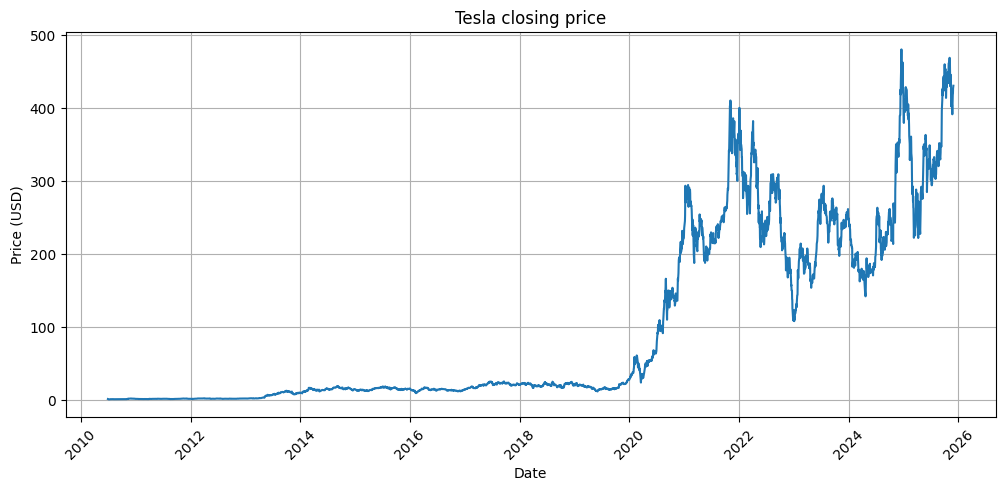

In [5]:
plt.figure(figsize=(12,5))
plt.plot(tsla_data["Date"], tsla_data["Close"])
plt.title("Tesla closing price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#TESLA Revenue

In [6]:
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

# Perform the request to get the url
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')


tables = soup.find_all('table')

if len(tables) >= 2:

    segunda_tabla = tables[1]
    df = pd.read_html(str(segunda_tabla))[0]
    display(df)
else:
    print(f"error {len(tables)} tables")

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [7]:
df.columns.values

array(['Tesla Quarterly Revenue (Millions of US $)',
       'Tesla Quarterly Revenue (Millions of US $).1'], dtype=object)

In [8]:
data = df.rename(columns = {"Tesla Quarterly Revenue (Millions of US $).1":"Tesla-Revenue","Tesla Quarterly Revenue (Millions of US $)":"Date-Quarterly"})

In [9]:
data["Tesla-Revenue"] = data["Tesla-Revenue"].str.replace("$","", regex=False) # remove "$""
data["Tesla-Revenue"] = data["Tesla-Revenue"].str.replace(",","", regex=False) # remove ","
data["Tesla-Revenue"] = data["Tesla-Revenue"].str.strip()   # remove spaces " " if they exist


In [10]:
suma = data["Tesla-Revenue"].iloc[0] + data["Tesla-Revenue"].iloc[1] # is it Data string, numerci, objetc? R// String
print(suma)

2145416934


In [11]:
data["Tesla-Revenue"].dtype

dtype('O')

In [12]:
display(data)

,Date-Quarterly,Tesla-Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [13]:
data["Tesla-Revenue"] = pd.to_numeric(data["Tesla-Revenue"], errors="coerce") # Transfor Data to numeric

In [14]:
suma = data["Tesla-Revenue"].iloc[0] + data["Tesla-Revenue"].iloc[1] # Now it is numeric

print(suma)

38388.0


In [15]:
# remove Null data

data = data.dropna()

In [16]:
data["Tesla-Revenue"] = data["Tesla-Revenue"].astype(int)

/tmp/ipython-input-3879525624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tesla-Revenue"] = data["Tesla-Revenue"].astype(int)


In [17]:
data["Date-Quarterly"] = pd.to_datetime(data["Date-Quarterly"])

/tmp/ipython-input-83553616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date-Quarterly"] = pd.to_datetime(data["Date-Quarterly"])


In [18]:
display(data)

,Date-Quarterly,Tesla-Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


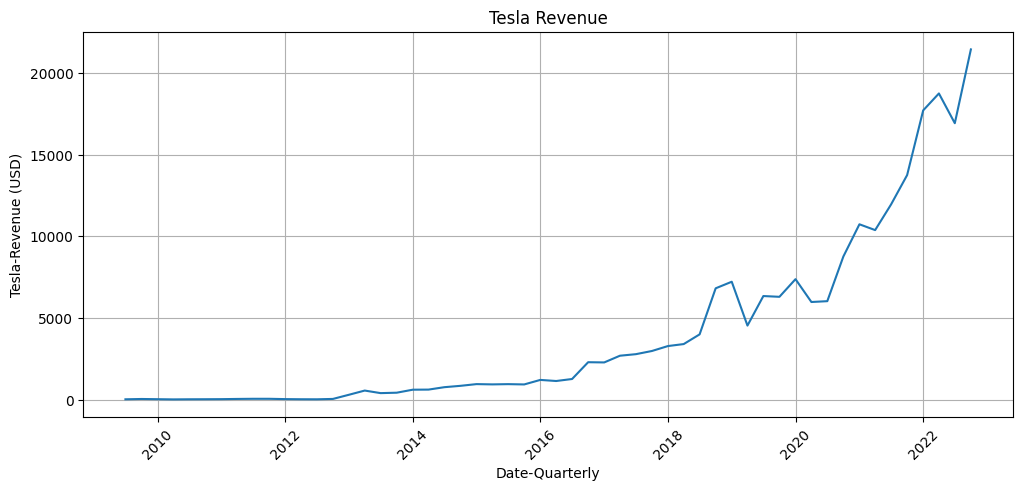

In [19]:
plt.figure(figsize=(12,5))
plt.plot(data["Date-Quarterly"], data["Tesla-Revenue"])
plt.title("Tesla Revenue")
plt.xlabel("Date-Quarterly")
plt.ylabel("Tesla-Revenue (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#Gamestop closing price

In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history("max")

gamestop_data.reset_index(inplace=True) #Reset index to transfor Data
gamestop_data["Date"] = pd.to_datetime(gamestop_data["Date"])  #Transfor to Date
gamestop_data["Close"] = pd.to_numeric(gamestop_data["Close"], errors='coerce') #Transforn to numeric


gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


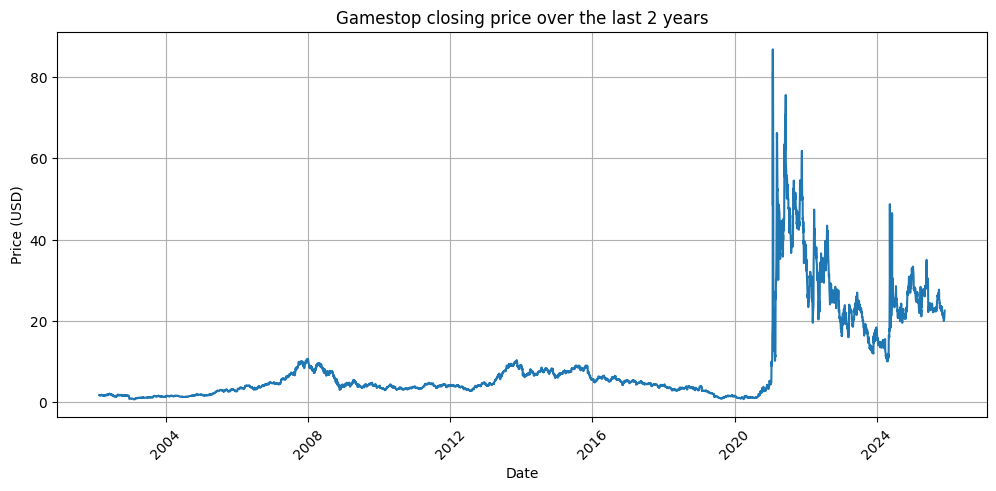

In [28]:

plt.figure(figsize=(12,5))
plt.plot(gamestop_data["Date"], gamestop_data["Close"])
plt.title("Gamestop closing price over the last 2 years")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#Gamestop Revenue

In [22]:
#get the url
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

#User-Agent—you make the server think the request is coming from a person using Chrome instead of from Python
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

# Perform the request to get the url
respuesta = requests.get(url, headers=headers)
soup = BeautifulSoup(respuesta.content, 'html.parser')

# find all tables
tables = soup.find_all('table')

if len(tables) >= 2:
    # Take the second table (Index 1)
    segunda_tabla = tables[1]
    df = pd.read_html(str(segunda_tabla))[0]  # [0] Because it is a single table
    display(df)
else:
    print(f"error {len(tables)} tables")

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [72]:
data = df.rename(columns = {"GameStop Quarterly Revenue (Millions of US $)":"Date(Quarterly)","GameStop Quarterly Revenue (Millions of US $).1":"gamestop-Revenue"})
data["gamestop-Revenue"] = data["gamestop-Revenue"].str.replace("$","", regex=False) # remove "$""
data["gamestop-Revenue"] = data["gamestop-Revenue"].str.replace(",","", regex=False) # remove ","
data["gamestop-Revenue"] = data["gamestop-Revenue"].str.strip()   # remove spaces " " if they exist
data = data.dropna() #remove Null data
data["gamestop-Revenue"] = data["gamestop-Revenue"].astype(int) #transfor to integer
data["Date(Quarterly)"] = pd.to_datetime(data["Date(Quarterly)"])


In [74]:
display(data)

,Date(Quarterly),gamestop-Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


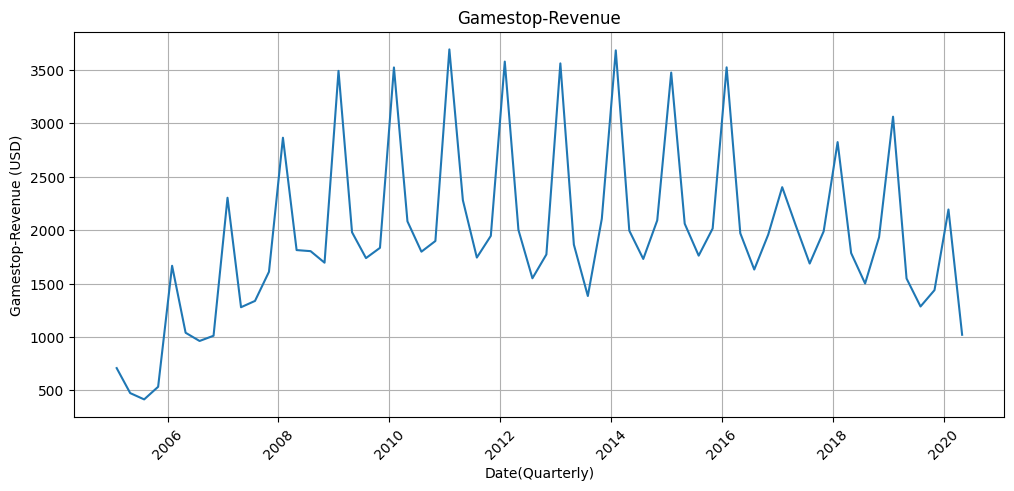

In [78]:
plt.figure(figsize=(12,5))
plt.plot(data["Date(Quarterly)"], data["gamestop-Revenue"])
plt.title("Gamestop-Revenue")
plt.xlabel("Date(Quarterly)")
plt.ylabel("Gamestop-Revenue (USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()